#  Exercise 1

With "websraping" go to DR.dk, and find all headlines containing the word or name of your choice. 
For example: "Mette", Vaccine", "Corona" and so on. 

Try to choose something popular/current, to be sure to get results/headlines. 

When printing the list of headlines, try also to print the amount of headlines in the list.

In [16]:
import matplotlib.pyplot as plt
import bs4
import requests
import urllib.request
import re

url = "https://www.dr.dk/"
rUrl = requests.get(url)
rUrl.raise_for_status()

beauti = bs4.BeautifulSoup(rUrl.text, 'html.parser')

listHeadlines = []
listWithVaccine = []

headlines = beauti.findAll('a')
for headline in headlines:
    listHeadlines.append(headline.getText())

for headline in headlines:
    if ('vaccine' in headline.getText()):
        listWithVaccine.append(headline.getText())
        
print(listWithVaccine, len(listWithVaccine))


['Globalt vaccineprogram køber 350 millioner doser Novavax', 'Tyskland vil tillade AstraZeneca-vaccine til voksne - familielæge skal give den ', 'Mette Frederiksen er klar til at se på Bidens forslag om at ophæve patenter på coronavacciner', 'Mette Frederiksen er klar til at se på Bidens forslag om at ophæve patenter på coronavacciner', 'Ugens coronatal forklaret: Kan vi stole på, at alle har fået vacciner til august?', 'Ugens coronatal forklaret: Kan vi stole på, at alle har fået vacciner til august?', "IOC og Pfizer vil sikre OL ved at give vacciner til alle atleter: 'Det er super glædeligt'", 'Slutdato for vacciner er rykket til 22. august: Se din vaccinationstid her', 'Se vaccinen blive rullet ud: Så langt er Danmark og resten af verden', 'Genåbning med restriktioner: Hvorfor egentlig, når de mest sårbare er vaccineret?\xa0', 'USA vil have patenter på coronavacciner ophævet midlertidigt', 'USA vil have patenter på coronavacciner ophævet midlertidigt'] 12


# Exercise 2. 
Pick 3 words from the text you get from exercise 1.

Use "Regular Expressions" to find whichever words you chose and show how many times they occur in the text with a bar plot.

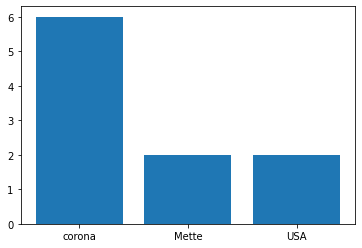

In [37]:
word1 = re.compile('corona')
word2 = re.compile('Mette')
word3 = re.compile('USA')

word1_find = word1.search(str(listWithVaccine))
word2_find = word2.search(str(listWithVaccine))
word3_find = word3.search(str(listWithVaccine))

all_word1 = word1.findall(str(listWithVaccine))
all_word2 = word2.findall(str(listWithVaccine))
all_word3 = word3.findall(str(listWithVaccine))

listOfNames = [word1_find.group(0), word2_find.group(0), word3_find.group(0)]
listOfTimes = [len(all_word1), len(all_word2), len(all_word3)]

plt.bar(listOfNames,listOfTimes)
plt.show()

# Exercise 3. 
Use selenium for this exercise
Use one of the 3 words as a search keyword and use google.com With that keyword and then get the first link from that search


In [53]:
from selenium.webdriver.firefox.options import Options
from selenium import webdriver

urlSelenium = 'https://www.google.com/'

options = Options()
options.headless = True

browser = webdriver.Firefox(options = options)
browser.get(urlSelenium)
browser.implicitly_wait(3)

searchBar = browser.find_element_by_name('q')
searchBar.send_keys('Corona')
searchBar.submit()

link = browser.find_element_by_xpath('//a[@href="https://www.sst.dk/da/corona"]')

the_link = link.get_attribute("href")
print(the_link)

https://www.sst.dk/da/corona
